# Srovnání SVD a randomizovaného SVD

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [302]:
n = 1000
q = n//4
X_dense = np.random.rand(n, n)
X_dense[q:3*q+1, q:3*q+1] = 0
X_dense[:q+1, :q+1] = 0
X_dense[3*q:, :q+1] = 0
X_dense[:q+1, 3*q:] = 0
X_dense[3*q:, 3*q:] = 0
print(X_dense)
X = csr_matrix(X_dense)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


407.2476351434398


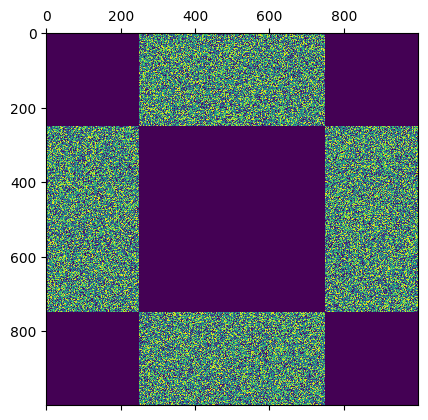

In [303]:
plt.matshow(X_dense)
print(np.linalg.norm(X_dense))

k=1: 321.78436661866516 20.9856 %:


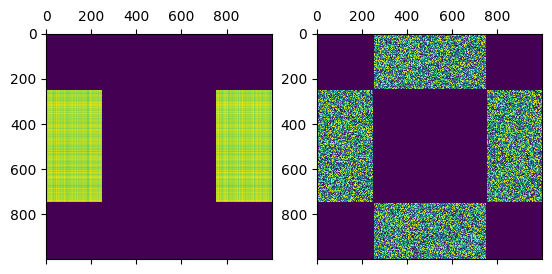

k=100: 169.14747497348628 58.4657 %:


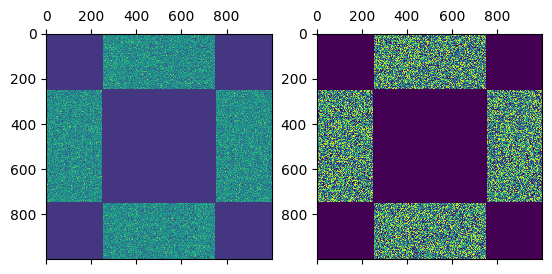

k=199: 139.34096701855498 65.7847 %:


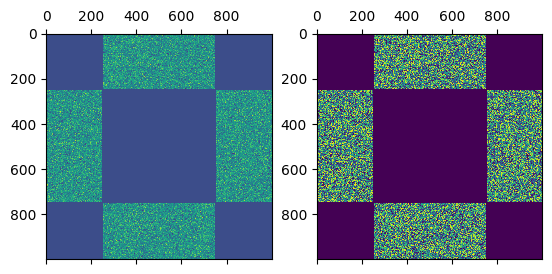

k=298: 112.66418090826633 72.3352 %:


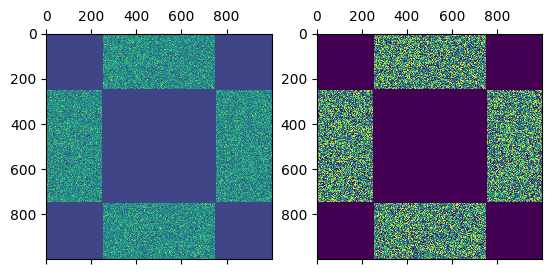

k=397: 88.70815749711024 78.2176 %:


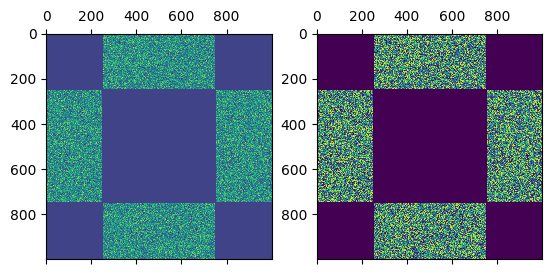

k=496: 67.08040369070784 83.5284 %:


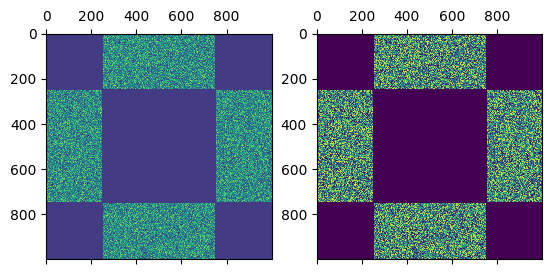

k=595: 47.88015174074949 88.243 %:


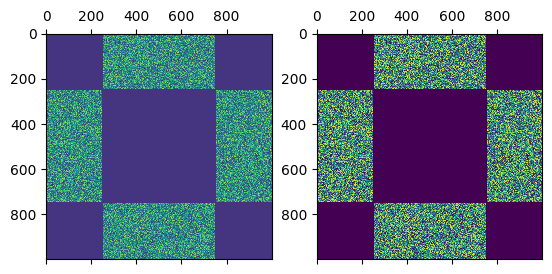

k=694: 31.24851374494643 92.3269 %:


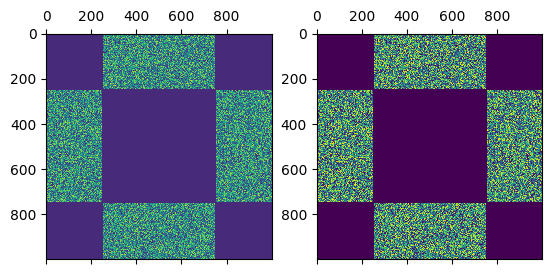

k=793: 17.217342040621567 95.7723 %:


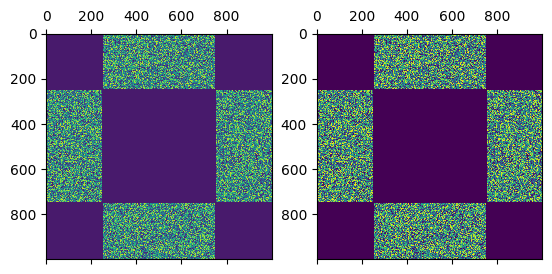

k=892: 6.31103240468052 98.4503 %:


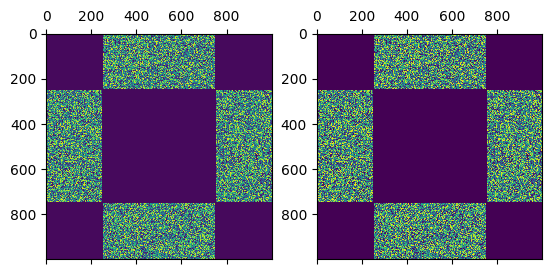

k=991: 0.09515713456365778 99.9766 %:


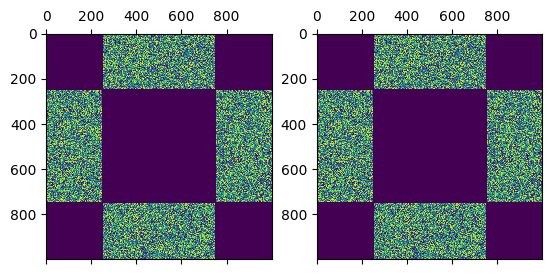

In [304]:
norm_dense = np.linalg.norm(X_dense)
for k in range(1, n, 99):
    svd = TruncatedSVD(n_components=k, algorithm="arpack")
    X_transformed = svd.fit_transform(X)
    X_new = X_transformed @ svd.components_
    norm_diff = np.linalg.norm(X_new - X_dense)
    print(f"k={k}: {norm_diff} {round((1 - norm_diff/norm_dense)*100, 4)} %:")
    fig, axes = plt.subplots(1, 2)
    axes[0].matshow(X_new)
    axes[1].matshow(X_dense)
    plt.show()